# Demanda de energia en California

## Punto 1
Haga una análisis descriptivo de la serie de tiempo, es decir, haga la gráfica
de la serie, gráfica de la función de autocorrelaci´on hasta 20 rezagos. Qué características puede usted observar al respecto? Es decir, es estacionaria
o no estacionaria? Por qu´e? Hay estructura de autocorrelación presente
en los datos?(2 puntos)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt

In [2]:
data = pd.ExcelFile('Serie de Ejercicios.xlsx')
print(data.sheet_names)

['Desocupados en miles', 'IPP', 'ISE', 'Colcap', 'PIB', 'Demanda Energía California']


In [3]:
df = data.parse('Demanda Energía California')

print(df)
type(df)

                 Date  Megawatts
0      04/14/2021 10H      24477
1      04/14/2021 09H      24899
2      04/14/2021 08H      25817
3      04/14/2021 07H      26670
4      04/14/2021 06H      28440
...               ...        ...
50734   07/1/2015 12H      31199
50735   07/1/2015 11H      31955
50736   07/1/2015 10H      33243
50737   07/1/2015 09H      35171
50738   07/1/2015 08H      38210

[50739 rows x 2 columns]


pandas.core.frame.DataFrame

In [4]:
df['Date'] = pd.to_datetime(df['Date']) ###Sólo es necesario si no tiene formato de fecha, entonces se transforma
df = df.sort_values(['Date'])

print(df)

                     Date  Megawatts
50738 2015-07-01 08:00:00      38210
50737 2015-07-01 09:00:00      35171
50736 2015-07-01 10:00:00      33243
50735 2015-07-01 11:00:00      31955
50734 2015-07-01 12:00:00      31199
...                   ...        ...
4     2021-04-14 06:00:00      28440
3     2021-04-14 07:00:00      26670
2     2021-04-14 08:00:00      25817
1     2021-04-14 09:00:00      24899
0     2021-04-14 10:00:00      24477

[50739 rows x 2 columns]


### Preprocesamiento de la serie

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Date
2015-07-01 08:00:00    38210
2015-07-01 09:00:00    35171
2015-07-01 10:00:00    33243
2015-07-01 11:00:00    31955
2015-07-01 12:00:00    31199
                       ...  
2021-04-14 06:00:00    28440
2021-04-14 07:00:00    26670
2021-04-14 08:00:00    25817
2021-04-14 09:00:00    24899
2021-04-14 10:00:00    24477
Name: Megawatts, Length: 50739, dtype: int64


Text(0.5, 1.0, 'Demanda de energía en california')

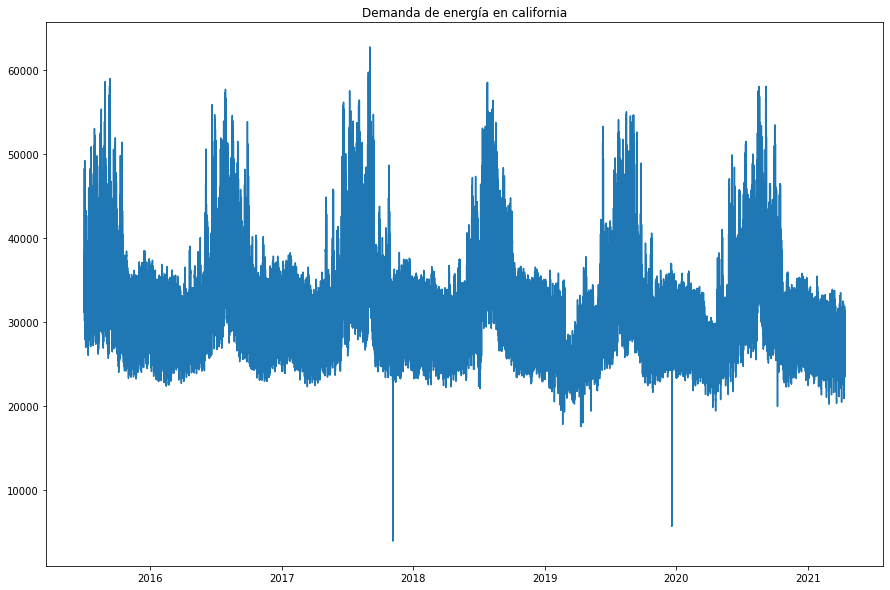

In [5]:
#df['Date'] = pd.to_datetime(df['Date']) ###Sólo es necesario si no tiene formato de fecha, entonces se transforma
EC = df.set_index('Date')  #establecer la columna Fecha como indice
#EC = EC.sort_values(['Date'])
print(type(EC))  ### no ha cambiado el tipo, solo cambio su indice 
#ColCap

ECts=EC['Megawatts']  ##inmediatamente es un objeto de series de tiempo 
print(type(ECts))
print(ECts)
plt.plot(ECts)  #ya sabe que el eje x es el indice
plt.title('Demanda de energía en california') 


### Descripción de los datos
La serie de tiempo parece que presenta tendencia pero no es muy claro, tambien presenta ciclos dentro de los años con valles a comienzos y finales de los años y picos en el medio año: PArece que la varianza marginal no es constante, veamos si es estacionaria en el grafico acf

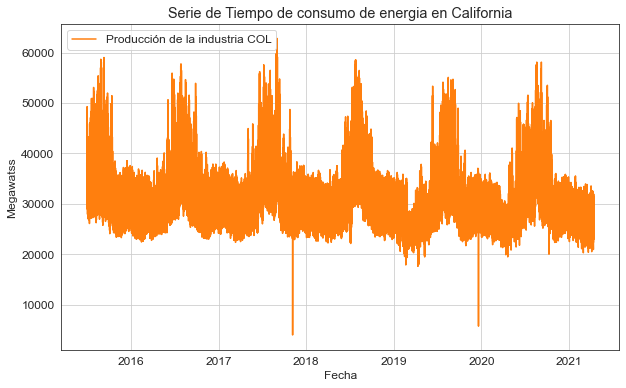

In [52]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(ECts, color='tab:orange', label='Producción de la industria COL')
ax.set_xlabel('Fecha')
ax.set_ylabel('Megawatss')
ax.set_title('Serie de Tiempo de consumo de energia en California')
ax.grid(True)
ax.legend(loc='upper left');

Los datos tienen una estructura de correlación muy marcada, no tiende a reducir la correlación por lo tanto es cíclica. Podemos concluir que la serie no es estacionaria

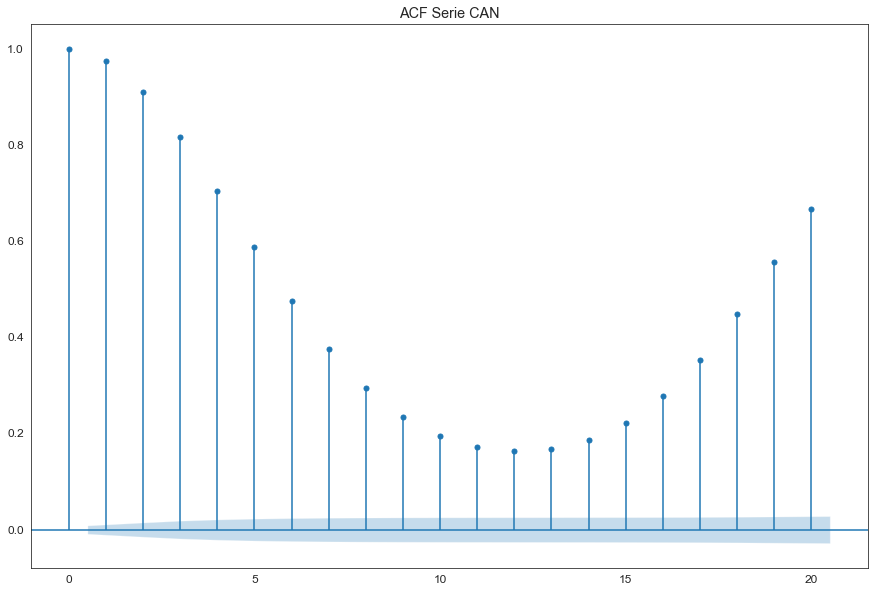

In [53]:
a=plot_acf(ECts,adjusted=False,lags=20,title='ACF Serie CAN')

## Punto 2
La serie de tiempo requiere de una transformaci´on del tipo Box-Cox? De sugerir el uso de transformaci´on, use el valor de λ que nos arroja Python. Explique(2 puntos)

In [54]:
import scipy as sp
import scipy.stats ####En ocasiones puede funcionar la línea 46 sin ésta línea.
data1 = df
print(sp.stats.boxcox(data1['Megawatts'],alpha=0.05))

(array([1.36433142, 1.36429387, 1.36426699, ..., 1.36413182, 1.36411033,
       1.36409999]), -0.7326376294698297, (-0.7566711271888524, -0.7082957255560149))


EL valor que sugiere python está entre -1 y 0, por lo tanto veamos si es necesario hacerle una transformación tipo BoxCox a los datos. Solo vamos a hacer la transformación y graficar la serie para ver si hay algun cambio importante

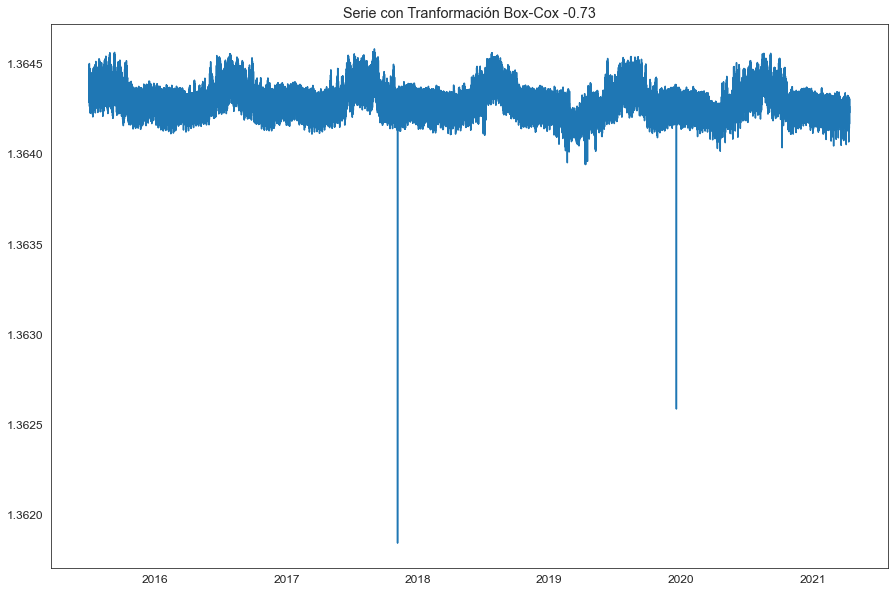

In [58]:
tEC =sp.stats.boxcox(data1['Megawatts'], lmbda=-0.7326)
trans = data1.assign(tEC=tEC)

tEC1 = trans.set_index(df['Date'])
tECco = tEC1['tEC']
plt.plot(tECco)
plt.title('Serie con Tranformación Box-Cox -0.73')
plt.show()

La serie cambió significativamente, entonces es necesario transformarla

In [59]:
print(tECco)

Date
2015-07-01 08:00:00    1.364401
2015-07-01 09:00:00    1.364364
2015-07-01 10:00:00    1.364337
2015-07-01 11:00:00    1.364317
2015-07-01 12:00:00    1.364305
                         ...   
2021-04-14 06:00:00    1.364256
2021-04-14 07:00:00    1.364220
2021-04-14 08:00:00    1.364202
2021-04-14 09:00:00    1.364180
2021-04-14 10:00:00    1.364170
Name: tEC, Length: 50739, dtype: float64


## Punto 3
Con base en la acf muestral, proponga el n´umero de retardos de la variable producci´on de ca˜na de az´ucar que deber´ıa tener en cuenta como covariables (recuerde que s´olo debe tener en cuenta las primeras 20 autocorrelaciones muestrales) para el ajuste de un modelo de arboles de decisi´on o de redes neuronales. Explique.(2 puntos)

Teniendo en cuenta que el acf es

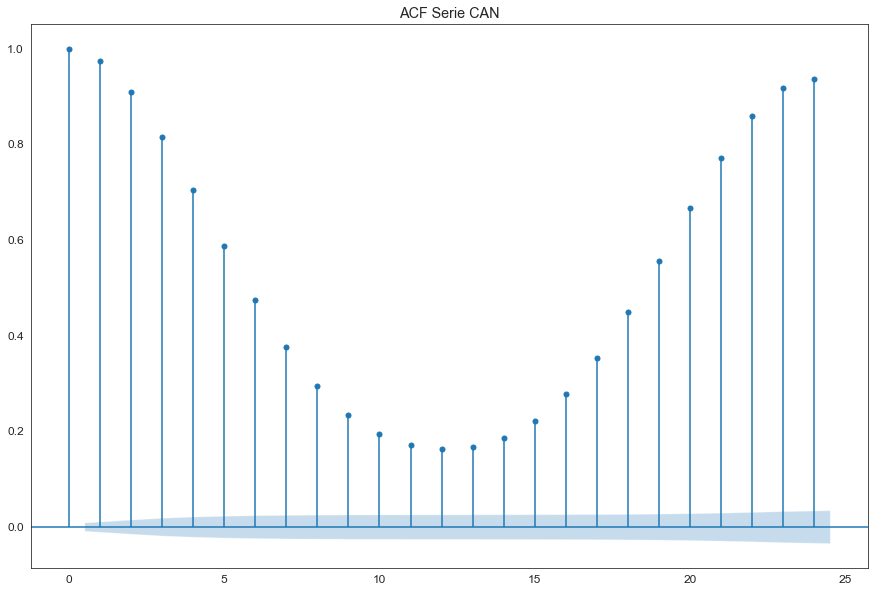

In [60]:
a=plot_acf(ECts,adjusted=False,lags=24,title='ACF Serie CAN')

Es claro que por el ciclo debemos tomar los primeros 24 retardos como covariables.

## Punto 4
Ajuste 3 modelos para la serie de tiempo indicada (1 de Suavizamiento exponencial, 1 de arboles de decisi´on y 1 de Redes neuronales multicapa.)

### Suavizamiento Exponencial
Lo ajustamos de la siguiente manera, recuerde que se debia hacer transformación de BoxCox entonces:

C:\Users\sanch\anaconda3\envs\series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\sanch\anaconda3\envs\series\lib\site-packages\statsmodels\tsa\holtwinters\results.py:169: FutureWarning: slope is deprecated and will be removed after 0.13
  warnings.warn(


Text(0, 0.5, 'resid')

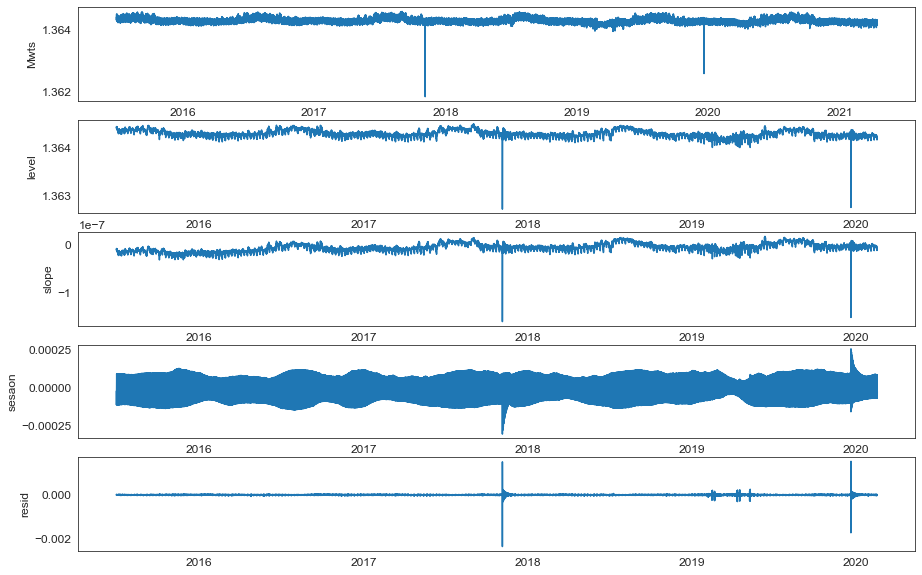

In [61]:
####Holt-Winters
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt #suavizamiento exponencial
#print(pd.infer_freq(data['Month'], warn=True))

traintECco = tECco[0:40591] # USAR EL TAMAÑO PARA VALIDAR DESPUES
fit1 = ExponentialSmoothing(traintECco, seasonal_periods=24, trend='add', seasonal='add', initialization_method="estimated",use_boxcox=False).fit()
#metemos la serie, hacemos explicita la frecuencia de cada cuanto observa

####ejecutar desde la línea 74 hasta la 88
plt.subplot(5, 1, 1)
plt.plot(tECco)
plt.ylabel('Mwts')
plt.subplot(5, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level')
plt.subplot(5, 1, 3)
plt.plot(fit1.slope)
plt.ylabel('slope')
plt.subplot(5, 1, 4)
plt.plot(fit1.season)
plt.ylabel('sesaon')
plt.subplot(5, 1, 5)
plt.plot(fit1.resid)
plt.ylabel('resid')

In [62]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,6.414286e-01,True
smoothing_trend,beta,9.999995e-05,True
smoothing_seasonal,gamma,1.054622e-01,True
initial_level,l.0,1.364420e+00,True
initial_trend,b.0,-1.022980e-08,True
initial_seasons.0,s.0,-2.067545e-05,True
initial_seasons.1,s.1,-5.334977e-05,True
initial_seasons.2,s.2,-8.147028e-05,True
initial_seasons.3,s.3,-1.005900e-04,True
initial_seasons.4,s.4,-1.101280e-04,True


<AxesSubplot:xlabel='Date'>

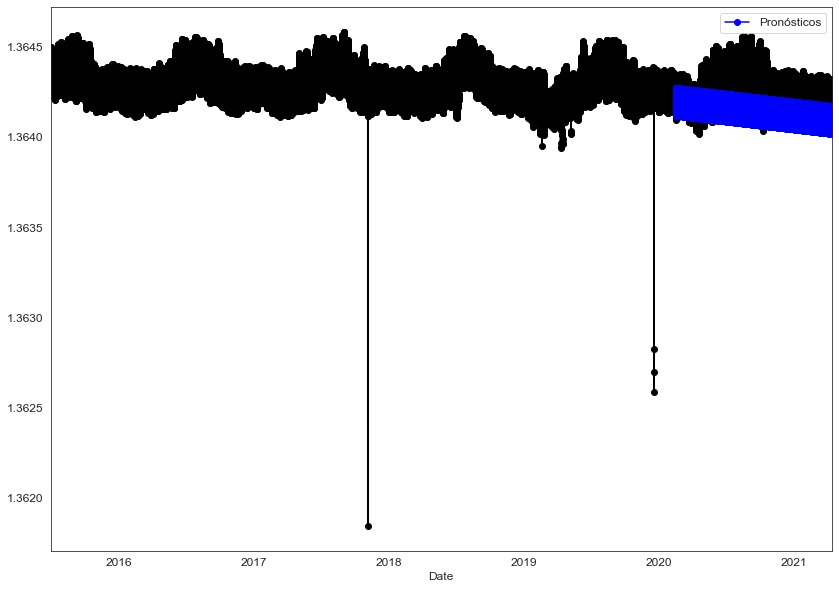

In [63]:
fcast1 = fit1.forecast(10148).rename("Pronósticos")
ax = tECco.plot(color="black", marker="o", figsize=(14,10))
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)

## Arboles de decisión
Solución

Vamos a trabajar con la serie original ya que la tendencia no es muy marcada, sin embargo, en caso de no dar buenos resultados o como mejoramiento del modelo podemos refinarnos y trabajar con la serie sin tendencia o diferenciada. Veremos que sucede durante del desarrollo.

Preparamos las covariables

In [6]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [7]:
ECdf = pd.DataFrame(ECts.values,index=ECts.index)
type(ECdf)
print(ECdf)

                         0
Date                      
2015-07-01 08:00:00  38210
2015-07-01 09:00:00  35171
2015-07-01 10:00:00  33243
2015-07-01 11:00:00  31955
2015-07-01 12:00:00  31199
...                    ...
2021-04-14 06:00:00  28440
2021-04-14 07:00:00  26670
2021-04-14 08:00:00  25817
2021-04-14 09:00:00  24899
2021-04-14 10:00:00  24477

[50739 rows x 1 columns]


In [8]:

for i in range(24,0,-1):
    df1[['t-'+str(i)]] = ECdf.shift(i)
    
print(df1)

                        t-24     t-23     t-22     t-21     t-20     t-19  \
Date                                                                        
2015-07-01 08:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2015-07-01 09:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2015-07-01 10:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2015-07-01 11:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
2015-07-01 12:00:00      NaN      NaN      NaN      NaN      NaN      NaN   
...                      ...      ...      ...      ...      ...      ...   
2021-04-14 06:00:00  28573.0  26627.0  25047.0  24320.0  23768.0  23503.0   
2021-04-14 07:00:00  26627.0  25047.0  24320.0  23768.0  23503.0  23985.0   
2021-04-14 08:00:00  25047.0  24320.0  23768.0  23503.0  23985.0  25354.0   
2021-04-14 09:00:00  24320.0  23768.0  23503.0  23985.0  25354.0  27319.0   
2021-04-14 10:00:00  23768.0  23503.0  23985.0  25354.0  27319.0  28483.0   

In [9]:

df1['t'] = ECdf.values
print(df1.head(13))

                     t-24  t-23  t-22  t-21  t-20  t-19  t-18  t-17  t-16  \
Date                                                                        
2015-07-01 08:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2015-07-01 09:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2015-07-01 10:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2015-07-01 11:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2015-07-01 12:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2015-07-01 13:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2015-07-01 14:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2015-07-01 15:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2015-07-01 16:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2015-07-01 17:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2015-07-01 18:00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

In [10]:
df1_EC = df1[24:]
print(df1_EC)
df1_EC.size

                        t-24     t-23     t-22     t-21     t-20     t-19  \
Date                                                                        
2015-07-02 08:00:00  38210.0  35171.0  33243.0  31955.0  31199.0  31540.0   
2015-07-02 09:00:00  35171.0  33243.0  31955.0  31199.0  31540.0  32551.0   
2015-07-02 10:00:00  33243.0  31955.0  31199.0  31540.0  32551.0  34483.0   
2015-07-02 11:00:00  31955.0  31199.0  31540.0  32551.0  34483.0  37003.0   
2015-07-02 12:00:00  31199.0  31540.0  32551.0  34483.0  37003.0  39274.0   
...                      ...      ...      ...      ...      ...      ...   
2021-04-14 06:00:00  28573.0  26627.0  25047.0  24320.0  23768.0  23503.0   
2021-04-14 07:00:00  26627.0  25047.0  24320.0  23768.0  23503.0  23985.0   
2021-04-14 08:00:00  25047.0  24320.0  23768.0  23503.0  23985.0  25354.0   
2021-04-14 09:00:00  24320.0  23768.0  23503.0  23985.0  25354.0  27319.0   
2021-04-14 10:00:00  23768.0  23503.0  23985.0  25354.0  27319.0  28483.0   

1267875

In [69]:
ECsplit = df1_EC.values
# split into lagged variables and original time series
X1= ECsplit[:, 0:-1] # slice all rows and start with column 0 and go up to but not including the last column
y1 =ECsplit[:,-1] # slice all rows and last column, essentially separating out 't' column

print(X1)
print(y1)

[[38210. 35171. 33243. ... 44996. 43173. 39545.]
 [35171. 33243. 31955. ... 43173. 39545. 36073.]
 [33243. 31955. 31199. ... 39545. 36073. 33603.]
 ...
 [25047. 24320. 23768. ... 30231. 28440. 26670.]
 [24320. 23768. 23503. ... 28440. 26670. 25817.]
 [23768. 23503. 23985. ... 26670. 25817. 24899.]]
[36073. 33603. 31746. ... 25817. 24899. 24477.]


In [70]:
from pandas import read_csv
Y1 = y1
traintarget_size = int(len(Y1) * 0.8) # Set split, este porcentaje tan raro es para que coincida con el 15.
#TAREA BUSCAR SI SE PUEDE AJUSTAR POR CUANTOS DIAS UNO QUIERE
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]
print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 50715
Training Observations for Target: 40572
Testing Observations for Target: 10143


In [71]:
# Features Train-Test split
trainfeature_size = int(len(X1) * 0.8)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)] ##Regresoras
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 50715
Training Observations for feature: 40572
Testing Observations for feature: 10143


Hacemos el modelo sin podar

In [72]:
#Decision Tree Regresion Model
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regression model with default arguments
decision_tree_EC = DecisionTreeRegressor() # max-depth not set
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_EC.fit(train_feature, train_target)
# Check the score on train and test
print(decision_tree_EC.score(train_feature, train_target))
print(decision_tree_EC.score(test_feature,test_target))

1.0
0.9847736813374663


Le fue muy bien, veamos ahora con la poda

In [73]:
for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_EC = DecisionTreeRegressor(max_depth=d)
    decision_tree_EC.fit(train_feature, train_target)
    # Print out the scores on train and test, deberiamos añadir el conjunto de validación cuando tengamos más modelos
    print('max_depth=', str(d))
    print(decision_tree_EC.score(train_feature, train_target))
    print(decision_tree_EC.score(test_feature, test_target), '\n')

max_depth= 2
0.8577399426327832
0.8398754541004396 

max_depth= 3
0.924826456685311
0.9217636355213787 

max_depth= 4
0.9542577109871049
0.9549167176766056 

max_depth= 5
0.9692174169727147
0.9687877096349128 

max_depth= 7
0.9841721178268017
0.9789456938591298 

max_depth= 8
0.9881637418771008
0.9828180141901783 

max_depth= 10
0.9932378434586555
0.9856154190153339 



El mejor score es para 10

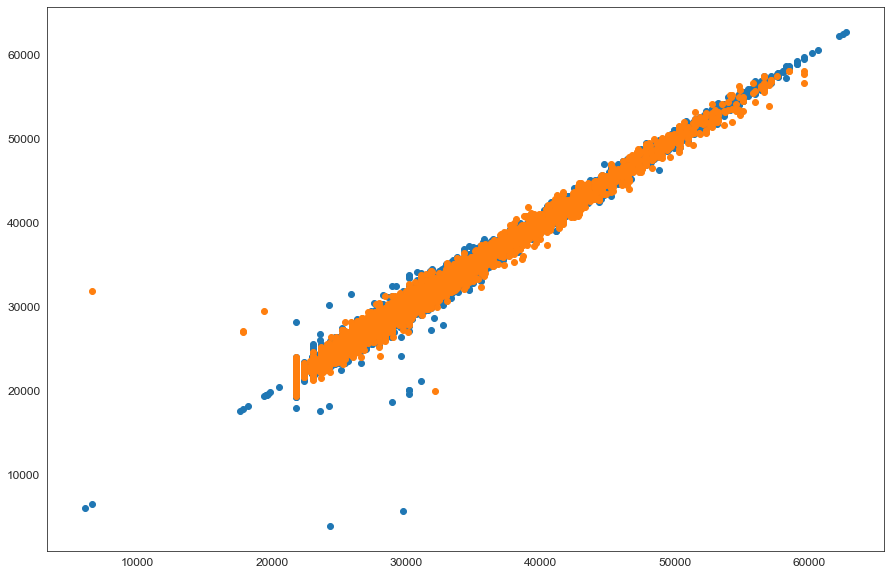

In [74]:
# Plot predicted against actual values
from matplotlib import pyplot as plt
# Use the best max_depth
decision_tree_EC = DecisionTreeRegressor(max_depth=10) # fill in best max depth here
decision_tree_EC.fit(train_feature, train_target)
# Predict values for train and test
train_prediction = decision_tree_EC.predict(train_feature)
test_prediction = decision_tree_EC.predict(test_feature)
# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train') # blue
plt.scatter(test_prediction, test_target, label='test') # orange
plt.show()

In [78]:
print(train_prediction.size)
print(train_target.size)

print(test_prediction.size)
print(test_target.size)

indicetrian_test=df1_EC.index
print(indicetrian_test.size) ###Tamaño del índice


40572
40572
10143
10143
50715


In [79]:
indicetrain=indicetrian_test[0:40571]
indicetest=indicetrian_test[40571:50714]

print(indicetrain.size)
print(indicetest.size)

targetjoint=np.concatenate((train_target,test_target))
predictionjoint=np.concatenate((train_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

40571
10143
50715
50715


In [80]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test)
ObsvsPred.head(10)

,observado,Predicción
Date,,
2015-07-02 08:00:00,36073.0,36069.812500
2015-07-02 09:00:00,33603.0,33682.423077
2015-07-02 10:00:00,31746.0,31828.650000
2015-07-02 11:00:00,30618.0,30878.130435
2015-07-02 12:00:00,30157.0,31177.965798
2015-07-02 13:00:00,30920.0,30537.928315
2015-07-02 14:00:00,32074.0,31860.548387
2015-07-02 15:00:00,34150.0,33619.195876
2015-07-02 16:00:00,36828.0,36206.836066


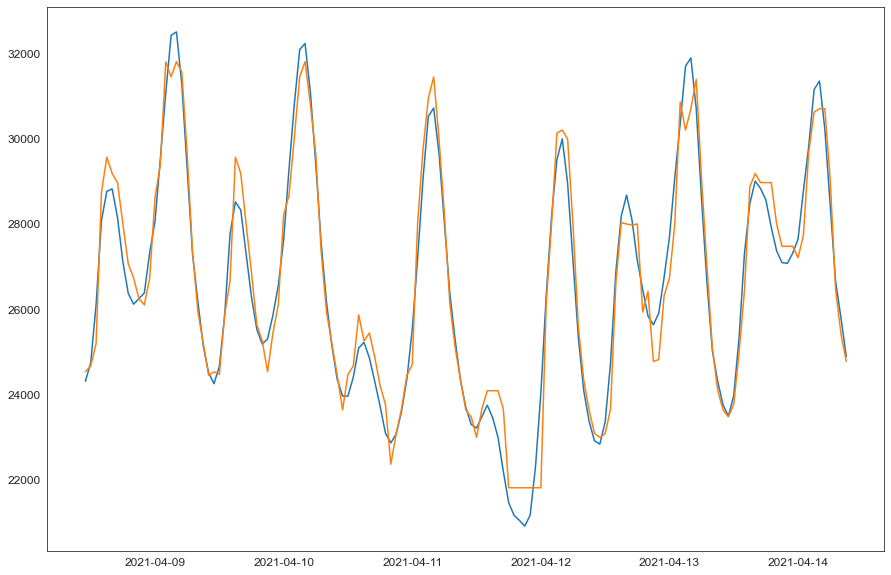

In [84]:
plt.plot(ObsvsPred[50571:50714])

### Redes Neuronales
Usamos las mismas covariables

In [12]:
print(df1_EC.head(7))
df1_EC.shape

                        t-24     t-23     t-22     t-21     t-20     t-19  \
Date                                                                        
2015-07-02 08:00:00  38210.0  35171.0  33243.0  31955.0  31199.0  31540.0   
2015-07-02 09:00:00  35171.0  33243.0  31955.0  31199.0  31540.0  32551.0   
2015-07-02 10:00:00  33243.0  31955.0  31199.0  31540.0  32551.0  34483.0   
2015-07-02 11:00:00  31955.0  31199.0  31540.0  32551.0  34483.0  37003.0   
2015-07-02 12:00:00  31199.0  31540.0  32551.0  34483.0  37003.0  39274.0   
2015-07-02 13:00:00  31540.0  32551.0  34483.0  37003.0  39274.0  41265.0   
2015-07-02 14:00:00  32551.0  34483.0  37003.0  39274.0  41265.0  43042.0   

                        t-18     t-17     t-16     t-15  ...      t-9  \
Date                                                     ...            
2015-07-02 08:00:00  32551.0  34483.0  37003.0  39274.0  ...  48083.0   
2015-07-02 09:00:00  34483.0  37003.0  39274.0  41265.0  ...  48300.0   
2015-07-02 10:

(50715, 25)

In [14]:
# Split data
PRESsplit = df1_EC.values
# split into lagged variables and original time series
X1= PRESsplit[:, 0:-1] # slice all rows and start with column 0 and go up to but not including the last column
y1 =PRESsplit[:,-1]

print(X1)
print(y1)

[[38210. 35171. 33243. ... 44996. 43173. 39545.]
 [35171. 33243. 31955. ... 43173. 39545. 36073.]
 [33243. 31955. 31199. ... 39545. 36073. 33603.]
 ...
 [25047. 24320. 23768. ... 30231. 28440. 26670.]
 [24320. 23768. 23503. ... 28440. 26670. 25817.]
 [23768. 23503. 23985. ... 26670. 25817. 24899.]]
[36073. 33603. 31746. ... 25817. 24899. 24477.]


Datos de entrenamiento y validación

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_val, y_train, y_val=train_test_split(X1,y1,test_size=0.2, train_size=0.8, shuffle=False)

print(X_train.shape) #80% DEL 90%
print(X_val.shape) #20 DEL 90%
print(y_train.shape)
print(y_val.shape)

(40572, 24)
(10143, 24)
(40572,)
(10143,)


Normalizamos covariables

In [16]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_train

array([[0.58218724, 0.53052377, 0.49774748, ..., 0.69755028, 0.666559  ,
        0.60488244],
       [0.53052377, 0.49774748, 0.47585128, ..., 0.666559  , 0.60488244,
        0.54585791],
       [0.49774748, 0.47585128, 0.46299917, ..., 0.60488244, 0.54585791,
        0.50386753],
       ...,
       [0.37570338, 0.35858423, 0.34811213, ..., 0.34102307, 0.35419819,
        0.35464019],
       [0.35858423, 0.34811213, 0.33767404, ..., 0.35419819, 0.35464019,
        0.34501811],
       [0.34811213, 0.33767404, 0.32740595, ..., 0.35464019, 0.34501811,
        0.33043197]])

Creamos la red

In [18]:
import tensorflow.keras as keras

input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(32,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(32,activation="relu")(hidden1)
#hidden3 = keras.layers.Dense(32, activation="relu")(hidden2) # verificar que no produzca nans
output_layer = keras.layers.Dense(1, activation='relu')(hidden1)

In [19]:
ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                800       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [20]:
ts_model.compile(loss="mean_squared_error",optimizer="sgd")
history=ts_model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
1268/1268 [==============================] - 2s 1ms/step - loss: 1053124466.2821 - val_loss: 937434688.0000
Epoch 2/50
1268/1268 [==============================] - 1s 575us/step - loss: 1049418863.0039 - val_loss: 937434688.0000
Epoch 3/50
1268/1268 [==============================] - 1s 550us/step - loss: 1051224531.1647 - val_loss: 937434688.0000
Epoch 4/50
1268/1268 [==============================] - 1s 568us/step - loss: 1050712546.4460 - val_loss: 937434688.0000
Epoch 5/50
1268/1268 [==============================] - 1s 666us/step - loss: 1053747313.2734 - val_loss: 937434688.0000
Epoch 6/50
1268/1268 [==============================] - 1s 652us/step - loss: 1057418325.4846 - val_loss: 937434688.0000
Epoch 7/50
1268/1268 [==============================] - 1s 570us/step - loss: 1050018019.5556 - val_loss: 937434688.0000
Epoch 8/50
1268/1268 [==============================] - 1s 543us/step - loss: 1053073168.5926 - val_loss: 937434688.0000
Epoch 9/50
1268/1268 [============

<AxesSubplot:>

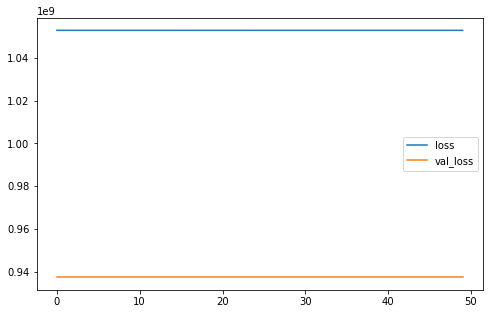

In [21]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [22]:
mse_test=ts_model.evaluate(X_val,y_val)
print(mse_test)

317/317 [==============================] - 0s 496us/step - loss: 937434688.0000
937434688.0


In [23]:
ypred=ts_model.predict(X_val)
print(ypred)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


## Punto 5
Obtenga el error cuadr´atico medio de predicci´on basado en los modelos ajustados del punto anterior y el conjunto de validaci´on. Cu´al modelo 1 escoger´ıa basado en ´este criterio ´unicamente?Tenga en cuenta que debe reportar el error cuadr´atico medio en la escala original de los datos.(2 puntos)

In [85]:
#ARBOLES DE DECISION
import statistics as stats
stats.mean((ObsvsPred["observado"] - ObsvsPred["Predicción"])**2)

333134.9456410014

In [87]:
#SUAVIZAMIENTO
stats.mean((fit1.resid)**2)

5.475085393296465e-10

In [24]:
#REDES
print(mse_test)

937434688.0


Claramente me quedo con suavizamiento

## Punto 6
Obtenga los residuales del modelo ˆet = yt − yˆt, y haga un chequeo de su gr´afica, y de la funci´on de autocorrelaci´on de los residuales. Qu´e puede usted decir al respecto para cada modelo?(2 puntos)

Para arboles

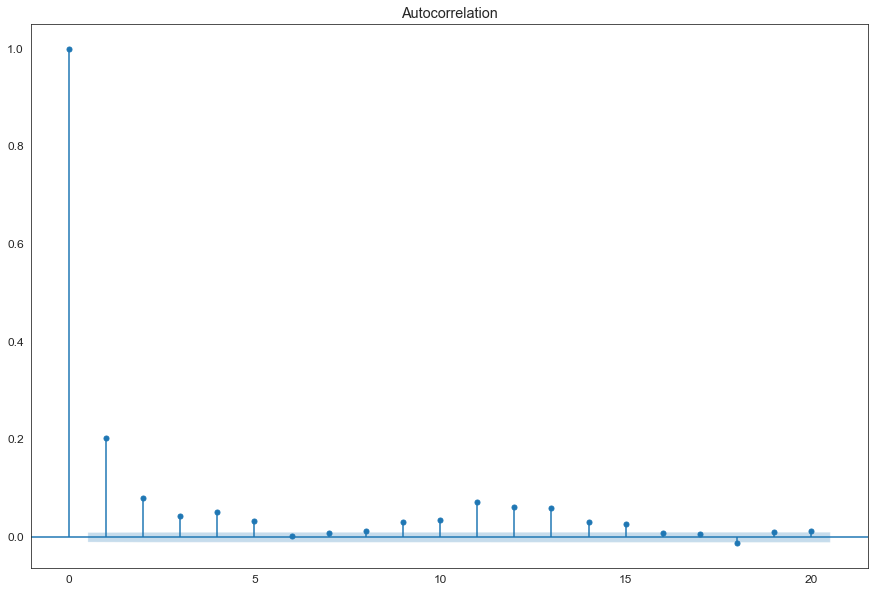

In [88]:
residuals = train_target - train_prediction
acfres=plot_acf(residuals, adjusted=False, lags=20)

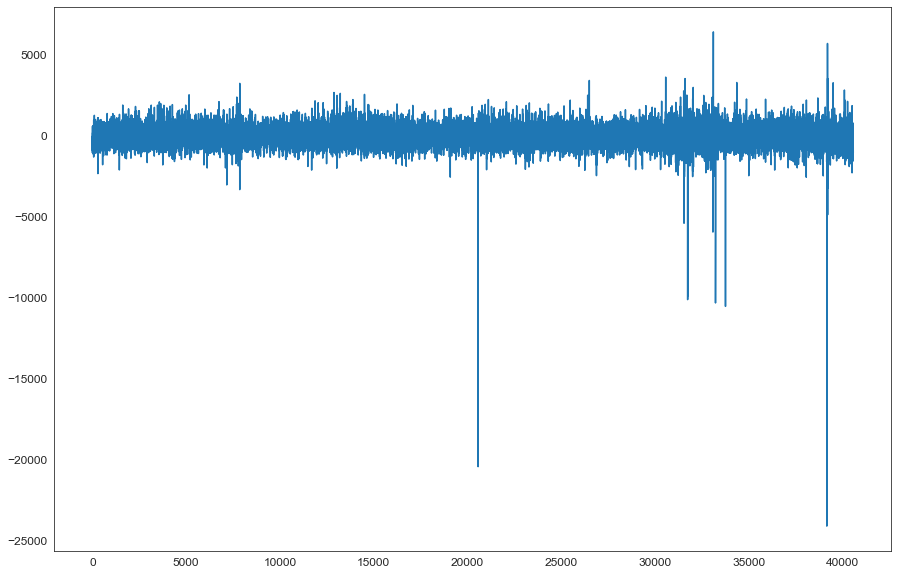

In [89]:
plt.plot(residuals)

Para suavizamiento

Text(0, 0.5, 'resid')

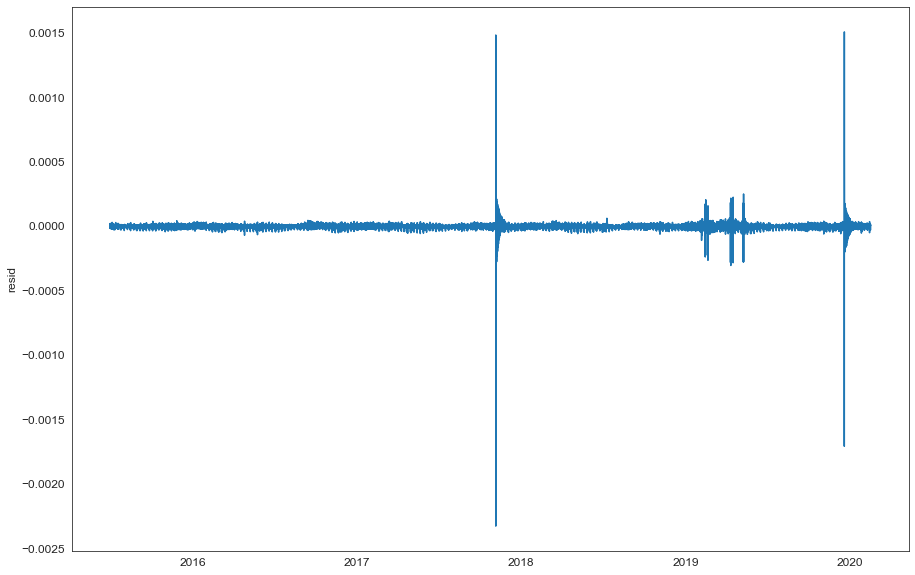

In [90]:
plt.plot(fit1.resid)
plt.ylabel('resid')

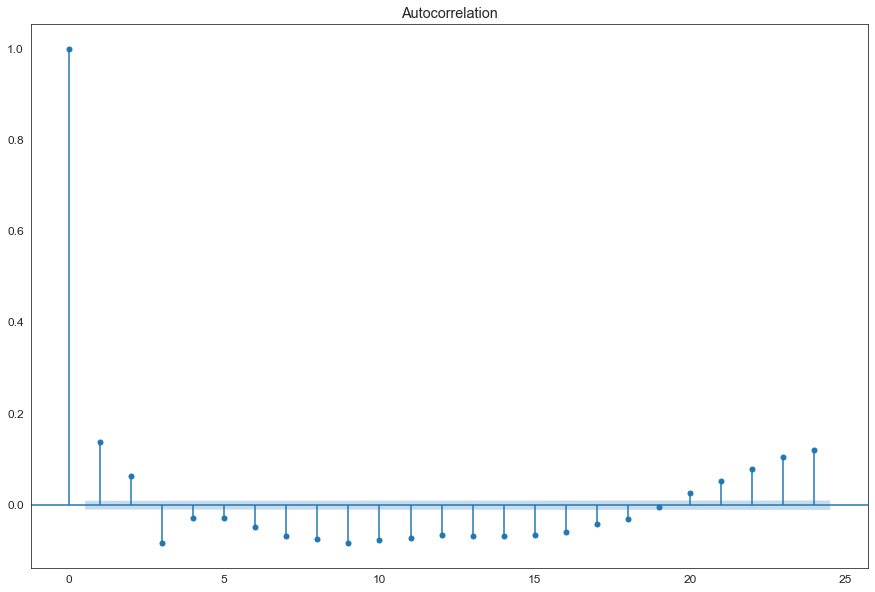

In [92]:
a = plot_acf(fit1.resid, adjusted = False, lags=24)

Para redes

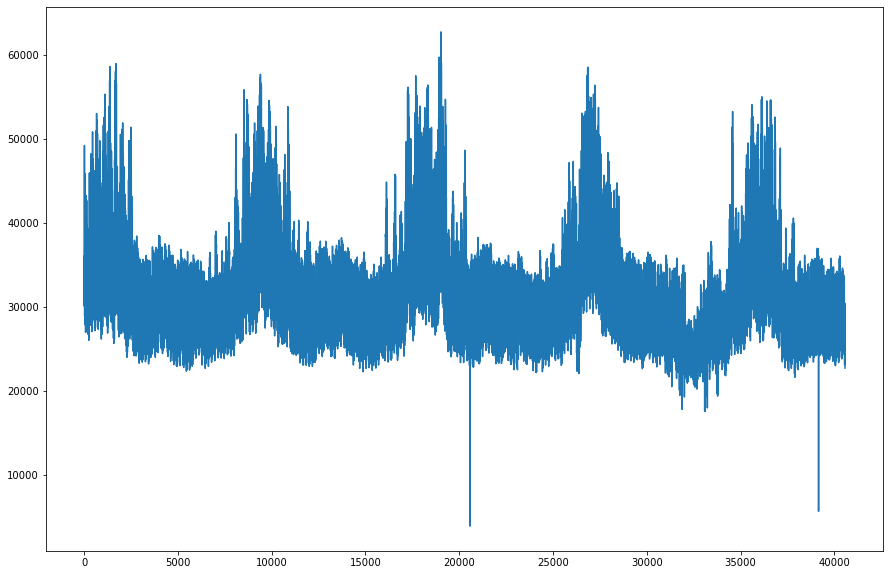

In [25]:
xpred = ts_model.predict(X_train)
datasetpred = pd.DataFrame({'Column1': xpred[:, 0]}) #ESTO PARA TRATAR EL ARREGLO N-DIMENSIONAL
ered = y_train - datasetpred['Column1']
plt.plot(ered)

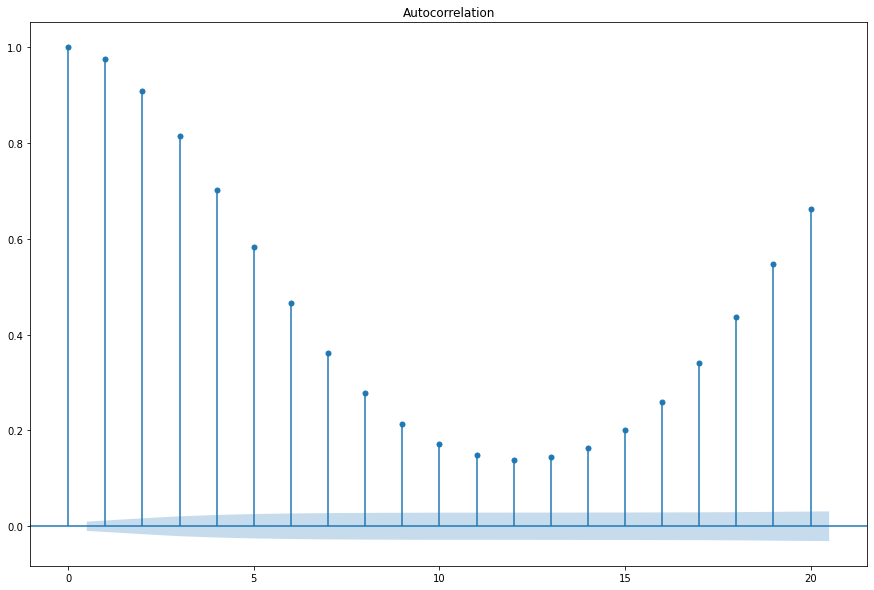

In [26]:
acfres=plot_acf(ered, adjusted=False, lags=20)